In [166]:
import pandas as pd
import math
import seaborn
import numpy
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [3]:
class kNN:
    def __init__(self):
        self.data_train = numpy.array([])
        self.labels_train = numpy.array([])
    
    def train(self, x, y):
        if len(x.shape) == 2 and len(y.shape) == 1 and y.shape[0] == x.shape[0]:
            self.data_train = x 
            self.labels_train = y
            self.labels = set(y)
            self.num_labels = len(self.labels)
        else:
            print("train unsuccessful, check your data")
    
    def predict(self, x, k):
        dtype = numpy.dtype([("distance",numpy.float),("label",numpy.int)])
        if x.shape[1] == self.data_train.shape[1]:
            predicted = numpy.array([])
            for vector in x:
                euk_distance = numpy.array([], dtype=dtype)
                for i, train in enumerate(self.data_train):
                    sum_distance = 0
                    for position, point in enumerate(vector):
                        sum_distance += pow(point - train[position], 2)
                    sum_distance = pow(sum_distance, 1/2)
                    euk_distance = numpy.append(euk_distance, numpy.array((sum_distance, self.labels_train[i]), dtype=dtype))
                euk_distance = numpy.sort(euk_distance, order="distance")
                euk_distance = euk_distance[:k]
                dtypeP = [("quanity",numpy.int), ("label", numpy.int)]
                prediction = numpy.array([], dtype=dtypeP)
                for label in self.labels:
                    quanity = sum([1 for (x,y) in euk_distance if y == label])
                    print((quanity,label))
                    prediction = numpy.append(prediction, numpy.array((quanity, label), dtype=dtypeP))
                prediction = numpy.sort(prediction, order="quanity")
                print(prediction)
                predicted = numpy.append(predicted, prediction[-1][1])
            return predicted
        else: 
            print("Wrong dimensions")
            return None
    
        

In [4]:
arr = numpy.array([1,2,3])

In [5]:
dd = set(arr)

In [6]:
iris = pd.read_csv("Iris.csv")

In [6]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
iris.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [7]:
iris["Cat"] = iris["Species"].astype("category").cat.codes

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cat
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0


In [205]:
xdata = numpy.array(iris[["SepalLengthCm","SepalWidthCm","PetalLengthCm"]])

In [186]:
ydata = numpy.array(iris[["Cat"]])

In [206]:
from sklearn.preprocessing import StandardScaler

In [201]:
scaler = StandardScaler()

In [207]:
xdata = scaler.fit_transform(xdata)

In [208]:
def shuffle(x,y):
    index = numpy.arange(len(x))
    numpy.random.shuffle(index)

    xshuffled = [x[i] for i in index]
    yshuffled = [y[i] for i in index]
    return xshuffled, yshuffled

In [209]:
xsh, ysh = shuffle(xdata,ydata)

In [12]:
def split(x, p=0.7):
    index = int(len(x)*p)
    return x[:index],x[index:]

In [13]:
xtrain, xtest = split(xsh)
ytrain, ytest = split(ysh)

In [227]:
knn = kNN()
knn.train(numpy.array(xtrain),numpy.array(ytrain).flatten())

(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(0, 0)
(5, 1)
(0, 2)
[(0, 0) (0, 2) (5, 1)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(0, 0)
(0, 1)
(5, 2)
[(0, 0) (0, 1) (5, 2)]
(0, 0)
(0, 1)
(5, 2)
[(0, 0) (0, 1) (5, 2)]
(0, 0)
(5, 1)
(0, 2)
[(0, 0) (0, 2) (5, 1)]
(0, 0)
(2, 1)
(3, 2)
[(0, 0) (2, 1) (3, 2)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(0, 0)
(1, 1)
(4, 2)
[(0, 0) (1, 1) (4, 2)]
(0, 0)
(0, 1)
(5, 2)
[(0, 0) (0, 1) (5, 2)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(0, 0)
(0, 1)
(5, 2)
[(0, 0) (0, 1) (5, 2)]
(0, 0)
(5, 1)
(0, 2)
[(0, 0) (0, 2) (5, 1)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(0, 0)
(5, 1)
(0, 2)
[(0, 0) (0, 2) (5, 1)]
(0, 0)
(2, 1)
(3, 2)
[(0, 0) (2, 1) (3, 2)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(0, 0)
(0, 1)
(5, 2)
[(0, 0) (0, 1) (5, 2)]
(0, 0)
(5, 1)
(0, 2)
[(0, 0) (0, 2) (5, 1)]
(0, 0)
(1, 1)
(4, 2)
[(0, 0) (1, 1) (4, 2)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0, 2) (5, 0)]
(5, 0)
(0, 1)
(0, 2)
[(0, 1) (0,

In [229]:
prediction

array([0., 1., 0., 2., 2., 1., 2., 0., 2., 2., 0., 2., 1., 0., 1., 2., 0.,
       0., 2., 1., 2., 0., 0., 0., 2., 1., 1., 1., 2., 2., 1., 2., 0., 2.,
       2., 1., 1., 1., 1., 0., 1., 2., 2., 1., 0.])

In [230]:
numpy.array(ytest).flatten()

array([0, 1, 0, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 2, 1, 2, 0,
       0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 2, 2, 2,
       0], dtype=int8)

In [189]:
dtype = numpy.dtype([("distance",numpy.float),("label",numpy.int)])

In [193]:
numpy.array([(1.000001, 2),(2.222, 1)], dtype=dtype)

array([(1.000001, 2), (2.222   , 1)],
      dtype=[('distance', '<f8'), ('label', '<i8')])

In [ ]:
def gridSearch(left, right,knn,xtest):
    results = numpy.array([])
    for i in range(left,right):
        numpy.append(results, [knn.predict(numpy.array(xtest),i)])
    return results

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
         xsh, ysh, test_size=0.33, random_state=42)

In [15]:
nbrs = NearestNeighbors(n_neighbors=2, algorithm='auto').fit(X_train)

In [16]:
distances, indices = nbrs.kneighbors(X_train)

In [17]:
distances[:20]

array([[0.        , 0.17320508],
       [0.        , 0.46904158],
       [0.        , 0.2236068 ],
       [0.        , 0.50990195],
       [0.        , 0.2236068 ],
       [0.        , 0.14142136],
       [0.        , 0.        ],
       [0.        , 0.3       ],
       [0.        , 0.46904158],
       [0.        , 0.37416574],
       [0.        , 0.1       ],
       [0.        , 0.24494897],
       [0.        , 0.24494897],
       [0.        , 0.24494897],
       [0.        , 0.31622777],
       [0.        , 0.17320508],
       [0.        , 0.14142136],
       [0.        , 0.2236068 ],
       [0.        , 0.        ],
       [0.        , 0.28284271]])

In [18]:
indices[:20]

array([[ 0, 71],
       [ 1, 25],
       [ 2, 58],
       [ 3, 57],
       [ 4, 34],
       [ 5, 54],
       [32,  6],
       [ 7, 30],
       [ 8, 56],
       [ 9, 42],
       [10, 82],
       [11, 26],
       [12, 74],
       [13,  4],
       [14, 27],
       [15, 61],
       [16, 46],
       [17, 65],
       [18, 25],
       [19, 41]])

In [19]:

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [20]:
accuracy_score(y_test, y_pred)

0.92

In [21]:
y_test

[array([1], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([2], dtype=int8),
 array([0], dtype=int8),
 array([0], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([0], dtype=int8),
 array([0], dtype=int8),
 array([2], dtype=int8),
 array([2], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([2], dtype=int8),
 array([0], dtype=int8),
 array([0], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([0], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([2], dtype=int8),
 array([2], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([0], dtype=int8),
 array([0], dtype=int8),
 array([0], dtype=int8),
 array([2], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([2], dtype=int8),
 array([1], dtype=int8),
 array([1], dtype=int8),
 array([2], dtype=int8),


In [22]:
from sklearn.metrics import balanced_accuracy_score

In [23]:
balanced_accuracy_score(y_test, y_pred)

0.9248366013071895

In [24]:
from sklearn.metrics import f1_score

In [25]:
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))  
print(f1_score(y_test, y_pred, average='weighted'))

0.9237472766884531
0.92
0.9198692810457516


In [26]:
y_pred = knn.predict(X_train)

In [27]:
print(accuracy_score(y_train, y_pred))
print(balanced_accuracy_score(y_train, y_pred))
print(f1_score(y_train, y_pred, average='macro'))
print(f1_score(y_train, y_pred, average='micro'))  
print(f1_score(y_train, y_pred, average='weighted'))

0.99
0.9895833333333334
0.9897338703308852
0.99
0.9899952617863066


In [28]:
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeaveOneGroupOut


In [35]:
kf = KFold(n_splits=2)
accpred = []
acctrue = []
for train_index, test_index in kf.split(xsh):
    X_train, X_test = [xsh[i] for i in train_index], [xsh[i] for i in test_index]
    y_train, y_test = [ysh[i] for i in train_index], [ysh[i] for i in test_index]
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accpred.append(y_pred)
    acctrue.append(y_test)

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [36]:
accpred

[array([1, 2, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1, 2,
        0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2,
        1, 2, 1, 2, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 0,
        2, 0, 1, 2, 1, 0, 2, 1, 1], dtype=int8),
 array([0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 2, 0, 2,
        0, 0, 1, 1, 0, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 0, 2, 2,
        2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 1,
        1, 0, 2, 0, 1, 1, 2, 0, 0], dtype=int8)]

In [34]:
acctrue

[[array([1], dtype=int8),
  array([2], dtype=int8),
  array([2], dtype=int8),
  array([1], dtype=int8),
  array([1], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([2], dtype=int8),
  array([0], dtype=int8),
  array([2], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([1], dtype=int8),
  array([0], dtype=int8),
  array([1], dtype=int8),
  array([2], dtype=int8),
  array([1], dtype=int8),
  array([2], dtype=int8),
  array([0], dtype=int8),
  array([1], dtype=int8),
  array([0], dtype=int8),
  array([1], dtype=int8),
  array([1], dtype=int8),
  array([1], dtype=int8),
  array([0], dtype=int8),
  array([2], dtype=int8),
  array([1], dtype=int8),
  array([0], dtype=int8),
  array([2], dtype=int8),
  array([2], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([0], dtype=int8),
  array([2],

In [38]:
for i,x in enumerate(acctrue):
    print(accuracy_score(acctrue[i], accpred[i]))
    print(balanced_accuracy_score(acctrue[i], accpred[i]))
    print(f1_score(acctrue[i], accpred[i], average='macro'))
    print(f1_score(acctrue[i], accpred[i], average='micro'))  
    print(f1_score(acctrue[i], accpred[i], average='weighted'))
    print('/')

0.9466666666666667
0.9506172839506174
0.9455555555555555
0.9466666666666667
0.9467555555555555
/
0.9333333333333333
0.9404761904761904
0.9346405228758169
0.9333333333333333
0.9333333333333333
/


In [1]:
from sklearn.model_selection import cross_val_score

In [91]:
X_train, X_test, y_train, y_test = train_test_split(
         xsh, ysh, test_size=0.33, random_state=42)

In [54]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
kf = KFold(n_splits=2)

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [59]:
cross_val_score(knn, X_test, y_test, cv=kf, scoring='f1_macro')

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.7       , 0.76388889])

In [58]:
cross_val_score(knn, X_test, y_test, cv=kf, scoring='accuracy')

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.68, 0.76])

In [192]:
cross_val_score(KNeighborsClassifier(n_neighbors = 5), X_test, y_test, cv=kf, scoring='balanced_accuracy')

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: 

array([0.83333333, 0.88888889, 0.88888889, 0.88888889, 0.83333333,
       1.        , 1.        ])

In [60]:
from sklearn.model_selection import GridSearchCV

In [136]:
param = {
    'n_neighbors' : [1,2,3,4,5,6,7,8,9],
    'weights': ['uniform','distance']
}

In [151]:
gcv = GridSearchCV(KNeighborsClassifier(), param, scoring='balanced_accuracy', cv=7, n_jobs=-1)

In [152]:
result = gcv.fit(X_train, y_train)

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [153]:
result.score(X_test, y_test)

0.9237472766884531

In [143]:
result.best_params_

{'n_neighbors': 5, 'weights': 'uniform'}

In [73]:
sorted(sklearn.neighbors.VALID_METRICS['brute'])

['braycurtis',
 'canberra',
 'chebyshev',
 'cityblock',
 'correlation',
 'cosine',
 'cosine',
 'dice',
 'euclidean',
 'hamming',
 'jaccard',
 'kulsinski',
 'l1',
 'l2',
 'mahalanobis',
 'manhattan',
 'matching',
 'minkowski',
 'precomputed',
 'rogerstanimoto',
 'russellrao',
 'seuclidean',
 'sokalmichener',
 'sokalsneath',
 'sqeuclidean',
 'wminkowski',
 'yule']

In [123]:

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [124]:
print(accuracy_score(y_test, y_pred))
print(balanced_accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))
print(f1_score(y_test, y_pred, average='micro'))  
print(f1_score(y_test, y_pred, average='weighted'))

0.92
0.9237472766884531
0.9237472766884531
0.92
0.92


In [149]:

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)
kf = KFold(n_splits=7)
y_pred = knn.predict(X_test)

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [155]:
cross_val_score(knn, X_test, y_test, cv=kf, scoring='balanced_accuracy')

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: 

array([0.83333333, 0.88888889, 0.88888889, 0.88888889, 0.83333333,
       1.        , 1.        ])

In [156]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

In [212]:
def val_curve():
    param_range=[1,2,3,4,5,6,7,8,9,10]
    train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_test, y_test, param_name="n_neighbors", param_range=param_range,
    cv=5, scoring="accuracy", n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title("Validation Curve with knn")
    plt.xlabel(r"$\gamma$")
    plt.ylabel("Score")
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: 

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


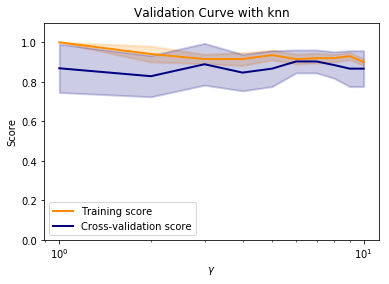

In [213]:
val_curve()

In [172]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [175]:
len(xsh)

150

/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/hexagramg/tmo/venv/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:528: DataConversion

<module 'matplotlib.pyplot' from '/home/hexagramg/tmo/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

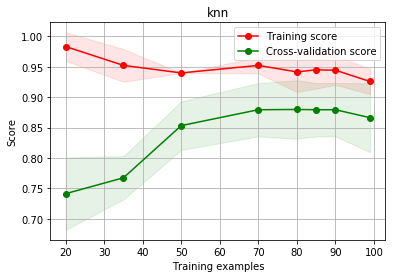

In [210]:
plot_learning_curve(KNeighborsClassifier(), 'knn', xsh, ysh, train_sizes=[20,35,50,70,80,85,90,99])